In [1]:
## git clone https://github.com/CSSEGISandData/COVID-19.git


In [2]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [4]:
import pandas as pd

In [5]:
dd1 = pd.read_csv(path+d1)
dd2 = pd.read_csv(path+d2)
dd3 = pd.read_csv(path+d3)


In [6]:
import json

with open("population_202004010609.json","r") as f:
    dd = json.loads(f.read())


In [7]:
dd['Korea, South'] = dd['South Korea']
dd['US'] = dd['United States']
dd['Czechia'] = dd['Czech Republic (Czechia)']
dd['Taiwan*'] = dd['Taiwan']
dd['Brunei'] = dd['Brunei ']

dd["Cote d'Ivoire"] = dd["Côte d'Ivoire"]


In [8]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/27/20             int64
3/28/20             int64
3/29/20             int64
3/30/20             int64
3/31/20             int64
Length: 74, dtype: object

In [9]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [10]:
def convertData(dd1,country,dd):
    df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
    df_0.loc['value', :] = df_0.sum()
    data = df_0.T[4:]
    data[country[0]] = data['value']/int(dd[country[0]])
    data['date'] = [ dateparse(i) for i in data.index ]

    error2 = []
    country2 = []
    for i in country:    
        df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
        df_1.loc['value', :] = df_1.sum()

        data_11 = df_1.T[4:]
        #data_11 = data_11.loc[lambda df: df['value'] >100]
        try:
            data_11[i] = data_11['value']/int(dd[i])
        except:
            print("--",i,"--")
            error2.append(i)
            continue

        data_1 = data_11
        data_1['date'] = [ dateparse(j) for j in data_1.index ]
        data = data.merge(data_1, how='outer', on='date')
        country2.append(i)
    return data, country2

In [11]:
data, country2 = convertData(dd1,country[1:],dd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


-- Congo (Brazzaville) --
-- Congo (Kinshasa) --
-- Diamond Princess --
-- Saint Vincent and the Grenadines --
-- West Bank and Gaza --
-- Saint Kitts and Nevis --
-- Kosovo --
-- Burma --
-- MS Zaandam --


In [12]:
dataDeath, country2 = convertData(dd2,country[1:],dd)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


-- Congo (Brazzaville) --
-- Congo (Kinshasa) --
-- Diamond Princess --
-- Saint Vincent and the Grenadines --
-- West Bank and Gaza --
-- Saint Kitts and Nevis --
-- Kosovo --
-- Burma --
-- MS Zaandam --


In [13]:
#data
df = data[country2[1:]+['date']]
df2 = dataDeath[country2[1:]+['date']]


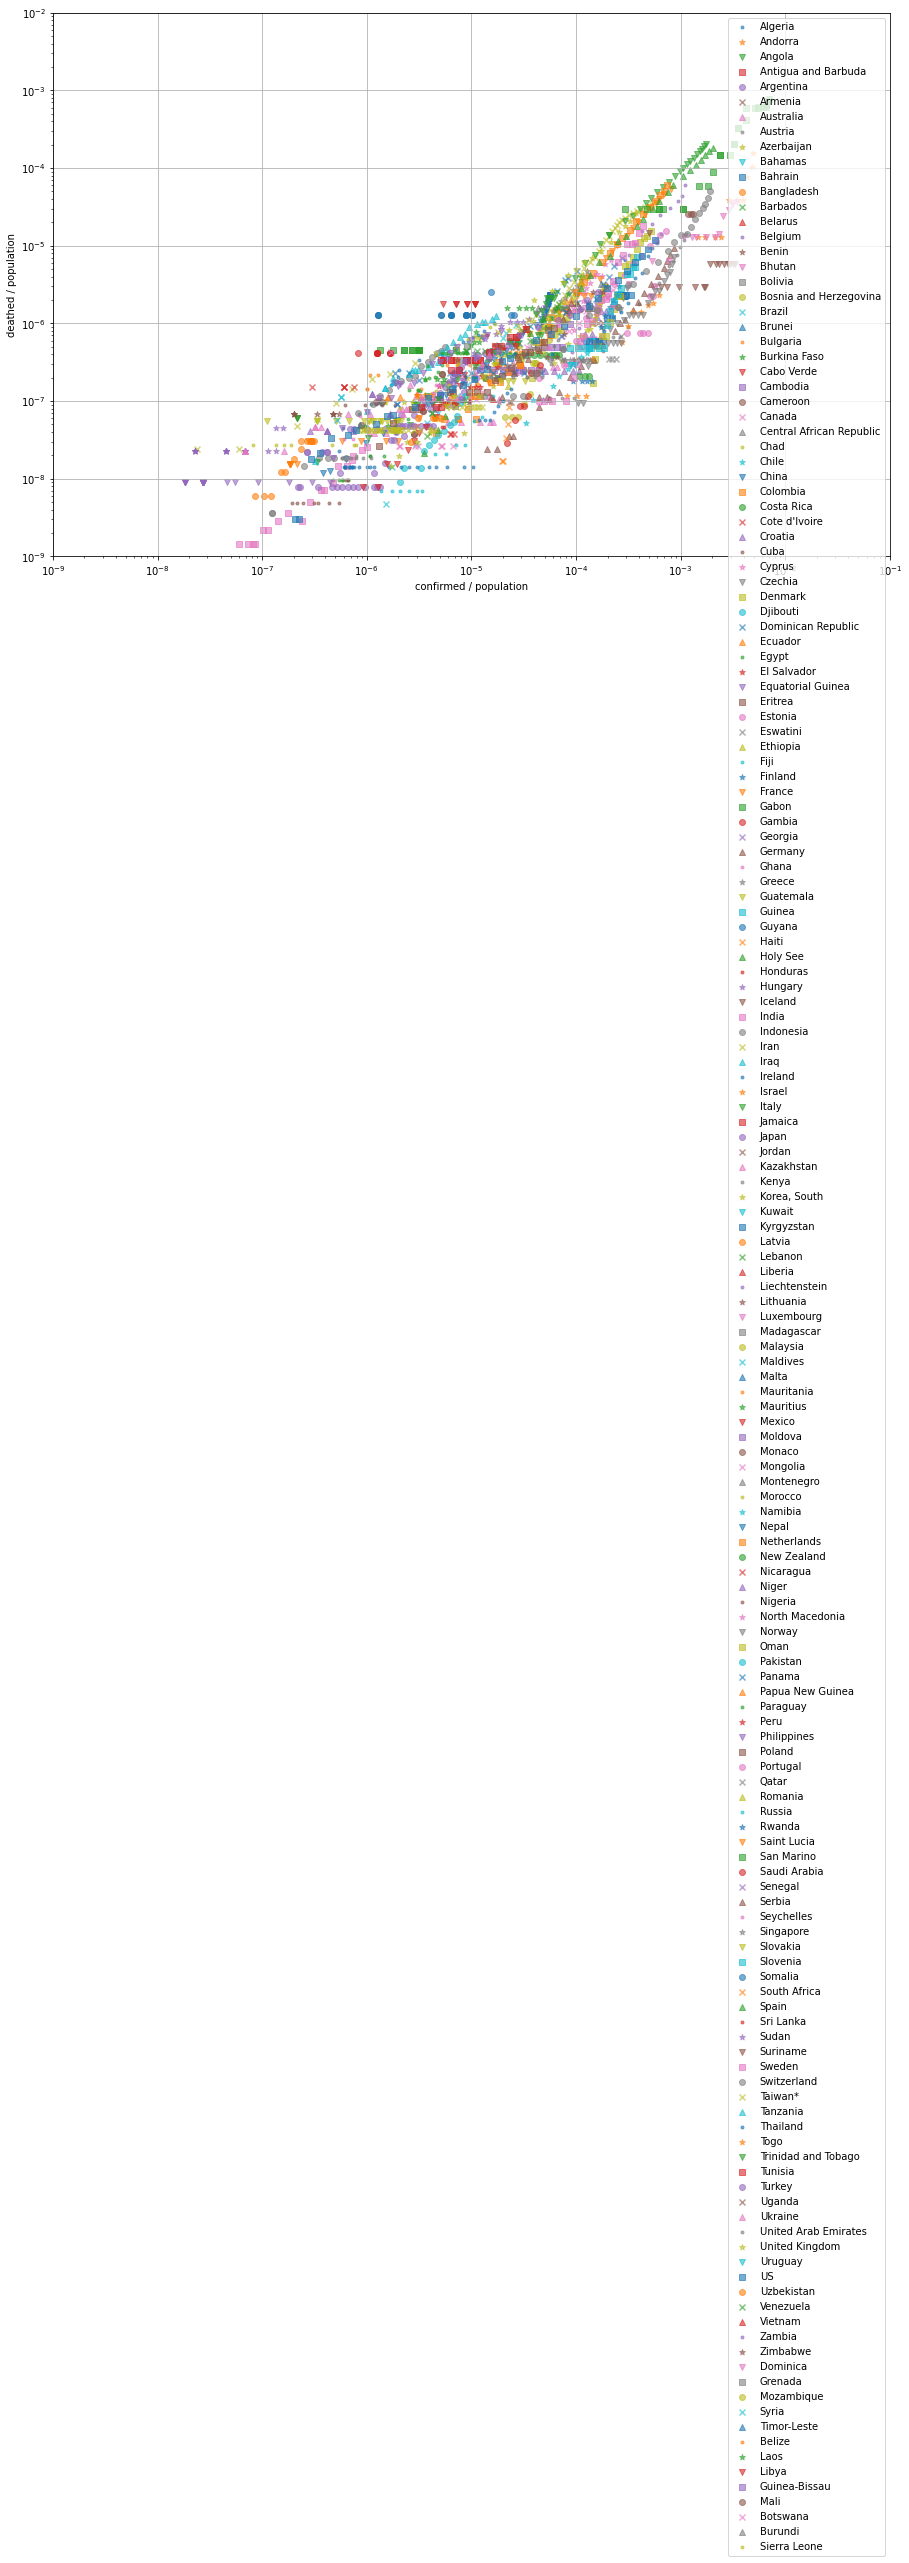

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = [".",'*','v','s','o','x',"^"]

for ii,i in enumerate(df.dtypes.keys()[:-1]):
    try:
        plt.scatter(df[i],df2[i], label=i, alpha=0.6, marker=maker[ii%7])
    except:
        continue
ax.grid(True)

ax.set_ylabel('deathed / population')
ax.set_xlabel('confirmed / population')

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(10**-9, 10**-1)
plt.ylim(10**-9, 10**-2)
ax.legend()


In [15]:
country3 = ['Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'France',
 'Germany',
 'Indonesia',
 'Iran',
 'Italy',
 'Korea, South',
 'Netherlands',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'US']


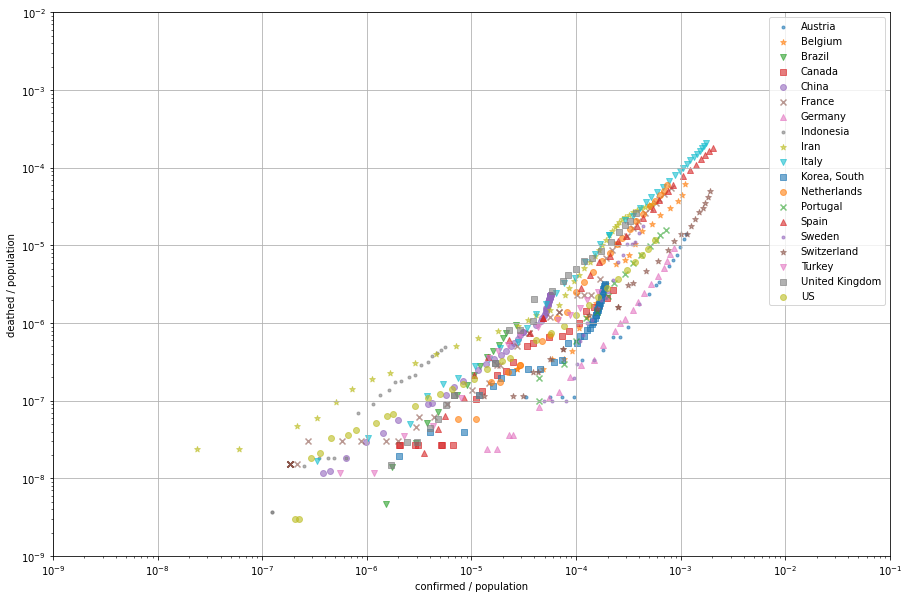

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = [".",'*','v','s','o','x',"^"]

for ii,i in enumerate(country3):
    try:
        plt.scatter(df[i],df2[i], label=i, alpha=0.6, marker=maker[ii%7])
    except:
        continue
ax.grid(True)

ax.set_ylabel('deathed / population')
ax.set_xlabel('confirmed / population')

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(10**-9, 10**-1)
plt.ylim(10**-9, 10**-2)
ax.legend()
